### Coupon Purchase Prediction :

In E-commerce contexts, issuing discount shopping coupons is a common approach to encourage sales. However, it is unknown whether a client will utilise the voucher.It is perspective to increase the coupon usage ratio in order to boost the coupon usage ratio. It is important to estimate the likelihood of a user redeeming a discount weather the person is gonna use coupon / weather the customer is gonna buy coupon.
We'll look into coupon utilisation likelihood prediction in this section.We treat the problem as a binary classification problem and utilise machine learning to solve it.Methods for analysing consumers' coupon usage behaviour are being learned. Wecarry out a thorough research of coupon usage patterns among consumers

Coupon Purchase Prediction's data is available on the Kaggle platform. 
link : https://www.kaggle.com/c/coupon-purchase-prediction

#### Summary :

E-commerce platform vendors may provide major promotions (e.g., discounts or cash coupons) on specified days or during specific vacations in order to attract a high number of new consumers.
Discount marketing and couponing are common promotional strategies for recruiting new consumers as well as keeping and strengthening existing customer loyalty. The ability to measure a consumer's propensity to use coupons and estimate redemption behaviour are crucial factors in determining the success of a marketing campaign.
Promotions for the client are sent out via a range of channels, including email, notifications, and social media. In a number of these promotions, coupons are issued for a single product or a range of items. The retailer's marketing team would like to be able to predict whether customers would redeem coupons received across channels, allowing them to design more precise and focused coupon structures and generate more accurate and targeted marketing techniques.

#### Goals :

Primary goal: Predict which coupons a consumer will buy in a particular period of time based on previous purchase and browsing activity. From July 2011 to June 2012, the data comprises a year's worth of transactional data for 22873 users. Over the next week, predictions will be made on 310 additional coupons, each with its own set of qualities. The goal is to guess which of these 310 coupons will be purchased by each of the 22873 people.

Conduct exploratory analysis on transactional data for 22,873 Ponpare users as a secondary aim.

Motivation: The generated models will be utilised to increase the ability to predict which coupons a consumer will purchase, ensuring that they do not miss out on their next favourite item.

#### Team Members :

Abraham G.K(20BDA20)

Rakshith Kumar K N(20BDA47)

Chandan J.R(20BDA51)

In [1]:
import pandas as pd
import os
import numpy as np
pd.set_option('display.max_columns', None)
import itertools
from zipfile import ZipFile          
import time
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import math
import datetime as dt
import sklearn as sk
from sklearn.preprocessing import *
from scipy import spatial

In [2]:
ds_dir = 'D:/aml2/'

In [3]:
#unzip dataset
with ZipFile(os.path.join(ds_dir,"coupon_detail_train.csv.zip"), 'r') as zipObj:
    zipObj.extractall()
with ZipFile(os.path.join(ds_dir,"coupon_list_test.csv.zip"), 'r') as zipObj:
    zipObj.extractall()
with ZipFile(os.path.join(ds_dir,"coupon_list_train.csv.zip"), 'r') as zipObj:
    zipObj.extractall()
with ZipFile(os.path.join(ds_dir,"coupon_area_train.csv.zip"), 'r') as zipObj:
    zipObj.extractall()
with ZipFile(os.path.join(ds_dir,"coupon_area_test.csv.zip"), 'r') as zipObj:
    zipObj.extractall()
with ZipFile(os.path.join(ds_dir,"coupon_visit_train.csv.zip"), 'r') as zipObj:
    zipObj.extractall()
with ZipFile(os.path.join(ds_dir,"sample_submission.csv.zip"), 'r') as zipObj:
    zipObj.extractall()
with ZipFile(os.path.join(ds_dir,"user_list.csv.zip"), 'r') as zipObj:
    zipObj.extractall()

### Datasets
Ponpare, a coupoun site that we found through Kaggle, provided us with user transactional data. From July 1, 2011 through June 23, 2012, the training set comprises 359 days of consumer activity. The test set runs from June 24 to June 30, 2012, one week following the training set, and comprises seven days of client engagement.

### Variables in datasets

#### User list.csv \User list.
The master list of users in the dataset is called csv. In user list.csv, there are a total of 22,873 records.

#### Coupon list train.csv and Coupon list test.csv.
Coupon list train.csv is a master list of coupons that make up the training set.Coupon list train.csv has a total of 19,413 entries.
The master list of coupons that are considered part of the test set is coupon list test.csv.
Coupon list test.csv has a total of 310 records. The 310 coupons will be used to make predictions for this project.

#### Coupn visit train.csv.
The viewing log of users browsing coupons throughout the training period is contained in the file coupon visit train.csv.
There are 2,833,180 records in coupon visit train.csv.

#### Coupon detail train.csv.
The coupon detail train.csv file contains a purchase record of users who purchased coupons throughout the training session. Coupon detail train has a total of 168,996 records.

#### Coupon area train.csv and Coupon area test.csv are two different types of spreadsheets.
The file coupon area train.csv contains a list of coupons and area locations that make up the training set.
Coupon list train.csv has a total of 13,8,185 entries in it.
The file coupon area test.csv contains a list of coupons and their locations in the test set.
The coupon area test.csv file has a total of 2142 entries. The 2142 coupons will be used to generate predictions for this project.

In [4]:
cd_train = pd.read_csv('coupon_detail_train.csv',parse_dates=['I_DATE'])
cl_test = pd.read_csv('coupon_list_test.csv', parse_dates=['DISPFROM', 'DISPEND', 'VALIDFROM', 'VALIDEND'])
cl_train = pd.read_csv('coupon_list_train.csv', parse_dates=['DISPFROM', 'DISPEND', 'VALIDFROM', 'VALIDEND'])
cv_train = pd.read_csv('coupon_visit_train.csv', parse_dates=['I_DATE'])
pref_loc = pd.read_csv(os.path.join(ds_dir,'prefecture_locations.csv'))
sample_sub = pd.read_csv('sample_submission.csv')
ar_train = pd.read_csv('coupon_area_train.csv')
ar_test =  pd.read_csv('coupon_area_test.csv')
user_list = pd.read_csv('user_list.csv',parse_dates=['WITHDRAW_DATE', 'REG_DATE'])

### Load Dataset

In [5]:
cl_train

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,151.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,154.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,179.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d
3,グルメ,グルメ,50,3000,1500,2011-07-09 12:00:00,2011-07-11 12:00:00,2,2011-07-12,2011-12-01,142.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,関東,千葉県,千葉,3e1ffbedca3569f9e8032d401e8cb4e6
4,グルメ,グルメ,50,2000,1000,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-12-30,176.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,関東,千葉県,千葉,782934b6c815b4030ea204eef7d4a734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19408,ネイル・アイ,ネイル・アイ,65,10000,3500,2011-07-14 12:00:00,2011-07-17 12:00:00,3,2011-07-18,2011-12-30,165.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,北信越,新潟県,新潟,fe334f1a5e0dc54eca76b9dd9559661b
19409,グルメ,グルメ,50,5980,2990,2011-09-30 12:00:00,2011-10-03 12:00:00,3,2011-10-04,2012-02-29,148.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,関東,東京都,新宿・高田馬場・中野・吉祥寺,8dc11b257cb1c5b98e7b7c66d9b2b779
19410,グルメ,グルメ,50,6300,3150,2011-09-03 12:00:00,2011-09-05 12:00:00,2,2011-09-06,2011-11-30,85.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,関東,東京都,渋谷・青山・自由が丘,b15e2d7619c3fd9c6be567c971bdf4f4
19411,グルメ,グルメ,50,2400,1200,2011-07-15 12:00:00,2011-07-17 12:00:00,2,2011-07-18,2011-10-31,105.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,関東,東京都,銀座・新橋・東京・上野,e1141a4b2798450f36e40090659c0b07


In [6]:
dsdir = 'D:/aml2/input/'

In [7]:
pref = pd.read_csv(os.path.join(dsdir,'PREF.csv'),index_col='jp') 

In [8]:
pref_office = pd.read_csv(os.path.join(dsdir,'pref_office.csv'),index_col='jp') 

In [9]:
small_area_name = pd.read_csv(os.path.join(dsdir,'SMALLAREA.csv'),index_col='jp')
big_area_name = pd.read_csv(os.path.join(dsdir,'LARGEAREA.csv'),index_col='jp') 

In [10]:
capsule_text = pd.read_csv(os.path.join(dsdir,'CAPSULE.csv'),index_col='jp')
genre_name = pd.read_csv(os.path.join(dsdir,'GENRE.csv'),index_col='jp')

### Translator : Translate JPN TO EN

In [11]:
cl_test.CAPSULE_TEXT = cl_test.CAPSULE_TEXT.replace(capsule_text.to_dict()['en']) 
cl_train.CAPSULE_TEXT = cl_train.CAPSULE_TEXT.replace(capsule_text.to_dict()['en'])

In [12]:
cl_test.GENRE_NAME = cl_test.GENRE_NAME.replace(genre_name.to_dict()['en']) 
cl_train.GENRE_NAME = cl_train.GENRE_NAME.replace(genre_name.to_dict()['en'])

In [13]:
cl_test.ken_name = cl_test.ken_name.replace(pref.to_dict()['en']) 
cl_train.ken_name = cl_train.ken_name.replace(pref.to_dict()['en']) 
pref_loc.PREF_NAME = pref_loc.PREF_NAME.replace(pref.to_dict()['en']) 
user_list.PREF_NAME = user_list.PREF_NAME.replace(pref.to_dict()['en'])
ar_train.PREF_NAME = ar_train.PREF_NAME.replace(pref.to_dict()['en'])
ar_test.PREF_NAME = ar_test.PREF_NAME.replace(pref.to_dict()['en'])

In [14]:
pref_loc.PREFECTUAL_OFFICE = pref_loc.PREFECTUAL_OFFICE.replace(pref_office.to_dict()['en'])

In [15]:
ar_train.SMALL_AREA_NAME = ar_train.SMALL_AREA_NAME.replace(small_area_name.to_dict()['en'])
ar_test.SMALL_AREA_NAME = ar_test.SMALL_AREA_NAME.replace(small_area_name.to_dict()['en'])
cd_train.SMALL_AREA_NAME = cd_train.SMALL_AREA_NAME.replace(small_area_name.to_dict()['en'])
cl_test.small_area_name = cl_test.small_area_name.replace(small_area_name.to_dict()['en']) 
cl_train.small_area_name = cl_train.small_area_name.replace(small_area_name.to_dict()['en'])

In [16]:
cl_test.large_area_name = cl_test.large_area_name.replace(big_area_name.to_dict()['en']) 
cl_train.large_area_name = cl_train.large_area_name.replace(big_area_name.to_dict()['en'])

In [17]:
def summary_table(table):
    df = pd.DataFrame()
    for i in table.columns:
        name = i
        dtype = table[i].dtype.name
        null = table[i].isnull().sum()
        act = table.shape[0] - null
        unique = len(table[i].unique())
        data = {'name': name, 'dtype': dtype, 'null': null, 'act': act, 'unique': unique}
        df = df.append(data, ignore_index=True)
    return df

### Data Preproceesing

In [18]:
cd_train['PURCHASE_FLG'] = 1
cv_train['VIEW'] = 1
cd_train.rename(columns = {'I_DATE': 'purchase_date', 'SMALL_AREA_NAME': 'resid_small' }, inplace=True) # 거주지 구분을 위해 컬럼명 변경
cv_train.rename(columns = {'I_DATE': 'view_date', 'VIEW_COUPON_ID_hash':'COUPON_ID_hash'}, inplace=True)

In [19]:
cd_train['purchase_date'] = pd.to_datetime(cd_train['purchase_date'].dt.date)
cv_train['view_date'] = pd.to_datetime(cv_train['view_date'].dt.date)

cv_train.drop(labels=['REFERRER_hash', 'SESSION_ID_hash', 'PURCHASEID_hash'], axis=1, inplace=True)
cd_train.drop(labels=['PURCHASEID_hash'], axis=1, inplace=True)


train = pd.merge(cd_train, cv_train, how='outer')

print(cd_train.shape)
print(cv_train.shape)
print(train.shape)

(168996, 6)
(2833180, 6)
(2913043, 9)


In [20]:
ar_train.columns

Index(['SMALL_AREA_NAME', 'PREF_NAME', 'COUPON_ID_hash'], dtype='object')

In [21]:
train2 = pd.merge(train, user_list, how='left', on='USER_ID_hash')

In [22]:
train2 = pd.merge(train2, cl_train, how='left', on='COUPON_ID_hash')

In [23]:
train2.rename(columns={'PREF_NAME':'user_pref', 'ken_name':'spot_pref'},inplace=True)

In [24]:
df = train2[['COUPON_ID_hash','USER_ID_hash','user_pref','spot_pref']]

In [25]:
lookup_table = ar_train.groupby('COUPON_ID_hash').apply(lambda x: list(x.PREF_NAME))
lookup_table = pd.DataFrame(lookup_table, columns = ['coupon_pref']).reset_index()

In [26]:
df_loc = pd.merge(df, lookup_table, how='left', on='COUPON_ID_hash')

In [27]:
df_loc['user_pref'] = df_loc['user_pref'].fillna("NA")

In [28]:
df_loc['coupon_pref'] = df_loc['coupon_pref'].fillna("NA_pref")

In [29]:
def aa(x, y):
    if x in y:
        return 1
    else:
        return 0

In [30]:
df_loc['PREF_in'] = df_loc.apply(lambda df2: aa(df2['user_pref'], df2['coupon_pref']), axis=1)

In [31]:
pref_loc.drop('PREFECTUAL_OFFICE', axis=1, inplace=True)

In [32]:
pref_loc.rename(columns={'PREF_NAME':'user_pref'},inplace=True)
df_loc = pd.merge(df_loc, pref_loc, how='left', on='user_pref')

pref_loc.rename(columns={'user_pref':'spot_pref'},inplace=True)
df_loc = pd.merge(df_loc, pref_loc, how='left', on='spot_pref')

In [33]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))

In [34]:
df_loc['distance'] = df_loc.apply(lambda df_loc : distance(df_loc['LATITUDE_x'] , df_loc['LONGITUDE_x'] ,df_loc['LATITUDE_y'], df_loc['LONGITUDE_y']), axis=1)

In [35]:
train_loc = df_loc[['COUPON_ID_hash', 'USER_ID_hash', 'distance', 'PREF_in']]

In [36]:
cl_list = pd.merge(cl_test, cl_train, how='outer')

In [37]:
cl_test.shape, cl_train.shape, cl_list.shape

((310, 24), (19413, 24), (19723, 24))

In [38]:
cl_list['Case'] = cl_list['CAPSULE_TEXT'] + cl_list['GENRE_NAME']
cl_list['Case'] = cl_list['Case'].apply(lambda x: "HOTEL" if x == 'Guest houseHotel and Japanese hotel' 
                          or x == 'HotelHotel and Japanese hotel'
                          or x == 'Japanese hotelHotel and Japanese hotel'
                          or x == 'Japanse guest houseHotel and Japanese hotel'
                          or x == 'LodgeHotel and Japanese hotel'
                          or x == 'Public hotelHotel and Japanese hotel'
                          or x == 'Resort innHotel and Japanese hotel'
                          or x == 'Vacation rentalHotel and Japanese hotel'
                          else "NAIL" if x == 'Nail and eye salonNail and eye salon'
                          else "HAIR" if x == 'Hair salonHair salon'
                          else "FOOD" if x == 'FoodFood'
                          else "SPA" if x == 'SpaSpa'
                          else "BEAUTY" if x == 'BeautyBeauty'
                          else "CLASS" if x == 'ClassLesson'
                          else "CORRESPONDENCE" if x == 'Correspondence courseLessonClassLesson'
                          else "DELIVERY" if x == 'Delivery serviceDelivery service'
                          else "EVENT" if x == 'EventOther coupon'
                          else "GIFT" if x == 'Gift cardGift card'
                          else "HEALTH" if x == 'Health and medicalHealth and medical'
                          else "LEISURE" if x == 'LeisureLeisure'
                          else "LESSON" if x == 'LessonLesson'
                          else "OTHER" if x == 'OtherOther coupon'
                          else "RELAXATION" if x == 'RelaxationRelaxation'
                          else "WEB" if x == 'Web serviceOther coupon'
                          else 'OTHER'
                          )

In [39]:
cl_list['Price'] = cl_list['CATALOG_PRICE'] + cl_list['DISCOUNT_PRICE']

In [40]:
cl_list["lnDPRICE"] = np.log1p(cl_list["Price"])
cl_list["mDPRICE"] = cl_list.groupby("Case")["lnDPRICE"].transform(np.mean)
cl_list["sDPRICE"] = cl_list.groupby("Case")["lnDPRICE"].transform(np.std)
cl_list["zprice"] = (cl_list["lnDPRICE"] - cl_list["mDPRICE"]) / cl_list["sDPRICE"]

In [41]:
cl_list.rename(columns = {"large_area_name": "spot_large", 
                              "ken_name": "spot_pref", 
                              "small_area_name": "spot_small"}, inplace=True)

In [42]:
cl_list['USABLE_DATE_MON'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)
cl_list['USABLE_DATE_TUE'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)
cl_list['USABLE_DATE_WED'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)
cl_list['USABLE_DATE_THU'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)
cl_list['USABLE_DATE_FRI'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)
cl_list['USABLE_DATE_SAT'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)
cl_list['USABLE_DATE_SUN'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)
cl_list['USABLE_DATE_HOLIDAY'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)
cl_list['USABLE_DATE_BEFORE_HOLIDAY'].replace([0,2,1,np.nan],[0,0,1,1], inplace=True)

In [43]:
cl_train = cl_list[311:]
cl_test = cl_list[:310]

In [44]:
user_list.rename(columns = {'PREF_NAME': 'user_pref'}, inplace=True)

In [45]:
user_list['SEX_ID'] = user_list['SEX_ID'].apply(lambda x: 0 if x == 'f' else 1) 

In [46]:
train= pd.merge(cv_train, cd_train, how='outer')

In [47]:
train.shape

(2913043, 9)

In [48]:
train = pd.merge(train, cl_list, how='left', on='COUPON_ID_hash')

In [49]:
train.shape

(2913043, 38)

In [50]:
train = pd.merge(train, user_list, how='left', on='USER_ID_hash')

In [51]:
train.shape

(2913043, 43)

In [52]:
summary_table(train).pivot_table(index = ['dtype', 'name'])

act       null   unique
dtype          name                                                     
datetime64[ns] DISPEND                     2597810.0   315233.0    376.0
               DISPFROM                    2597810.0   315233.0    381.0
               REG_DATE                    2913043.0        0.0  22802.0
               VALIDEND                    1804706.0  1108337.0    516.0
               VALIDFROM                   1804706.0  1108337.0    378.0
               WITHDRAW_DATE                 19407.0  2893636.0    920.0
               purchase_date                202252.0  2710791.0    360.0
               view_date                   2859226.0    53817.0    360.0
float64        CATALOG_PRICE               2597810.0   315233.0   2417.0
               DISCOUNT_PRICE              2597810.0   315233.0   1116.0
               DISPPERIOD                  2597810.0   315233.0     19.0
               ITEM_COUNT                   202252.0  2710791.0     33.0
               PAGE_SERIAL                 2859226.0    53817.0    467.0
               PRICE_RATE                  2597810.0   315233.0     72.0
               Price                       2597810.0   315233.0   4087.0
               USABLE_DATE_BEFORE_HOLIDAY  2597810.0   315233.0      3.0
               USABLE_DATE_FRI             2597810.0   315233.0      3.0
               USABLE_DATE_HOLIDAY         2597810.0   315233.0      3.0
               USABLE_DATE_MON             2597810.0   315233.0      3.0
               USABLE_DATE_SAT             2597810.0   315233.0      3.0
               USABLE_DATE_SUN             2597810.0   315233.0      3.0
               USABLE_DATE_THU             2597810.0   315233.0      3.0
               USABLE_DATE_TUE             2597810.0   315233.0      3.0
               USABLE_DATE_WED             2597810.0   315233.0      3.0
               VALIDPERIOD                 1804706.0  1108337.0    181.0
               VIEW                        2859226.0    53817.0      2.0
               lnDPRICE                    2597810.0   315233.0   4087.0
               mDPRICE                     2597810.0   315233.0      9.0
               sDPRICE                     2597810.0   315233.0      9.0
               zprice                      2597810.0   315233.0   5725.0
int64          AGE                         2913043.0        0.0     66.0
               PURCHASE_FLG                2913043.0        0.0      2.0
               SEX_ID                      2913043.0        0.0      2.0
object         CAPSULE_TEXT                2597810.0   315233.0     25.0
               COUPON_ID_hash              2913043.0        0.0  32629.0
               Case                        2597810.0   315233.0      9.0
               GENRE_NAME                  2597810.0   315233.0     14.0
               USER_ID_hash                2913043.0        0.0  22833.0
               resid_small                  202252.0  2710791.0     56.0
               spot_large                  2597810.0   315233.0     10.0
               spot_pref                   2597810.0   315233.0     48.0
               spot_small                  2597810.0   315233.0     56.0
               user_pref                   2355031.0   558012.0     48.0

In [53]:
train = train[train['DISPFROM'].notnull()]

In [54]:
train['VALIDPERIOD'] = train['VALIDPERIOD'].fillna(179)
train['user_pref'] = train['user_pref'].fillna('NN')
train = train.drop(labels = ['ITEM_COUNT'], axis=1)
train = train.drop(labels = ['PAGE_SERIAL'], axis=1)

In [55]:
print('Total Purchase: {}'.format(train.PURCHASE_FLG.sum(), ','))
print('All Purchase: {}'.format(len(train.PURCHASE_FLG)))
plt.pie([train.PURCHASE_FLG.sum(), len(train.PURCHASE_FLG)], labels=["buy", "no"],
        autopct='%1.1f%%', 
        startangle=50)

Total Purchase: 202252
All Purchase: 2597810


([<matplotlib.patches.Wedge at 0x278ae7bdbb0>,
 [Text(0.4993617352564565, 0.9801213482838035, 'buy'),
  Text(-0.4993616664322679, -0.9801213833490159, 'no')],
 [Text(0.2723791283217035, 0.5346116445184382, '7.2%'),
  Text(-0.272379090781237, -0.5346116636449176, '92.8%')])

## EDA (Exploratory Data Analysis)

In [56]:
df = train.copy()

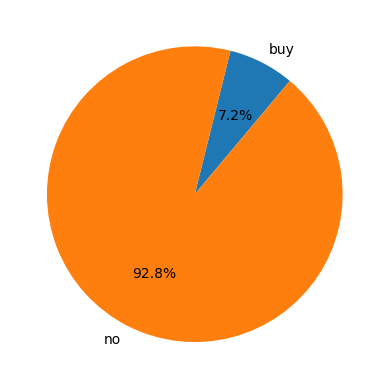

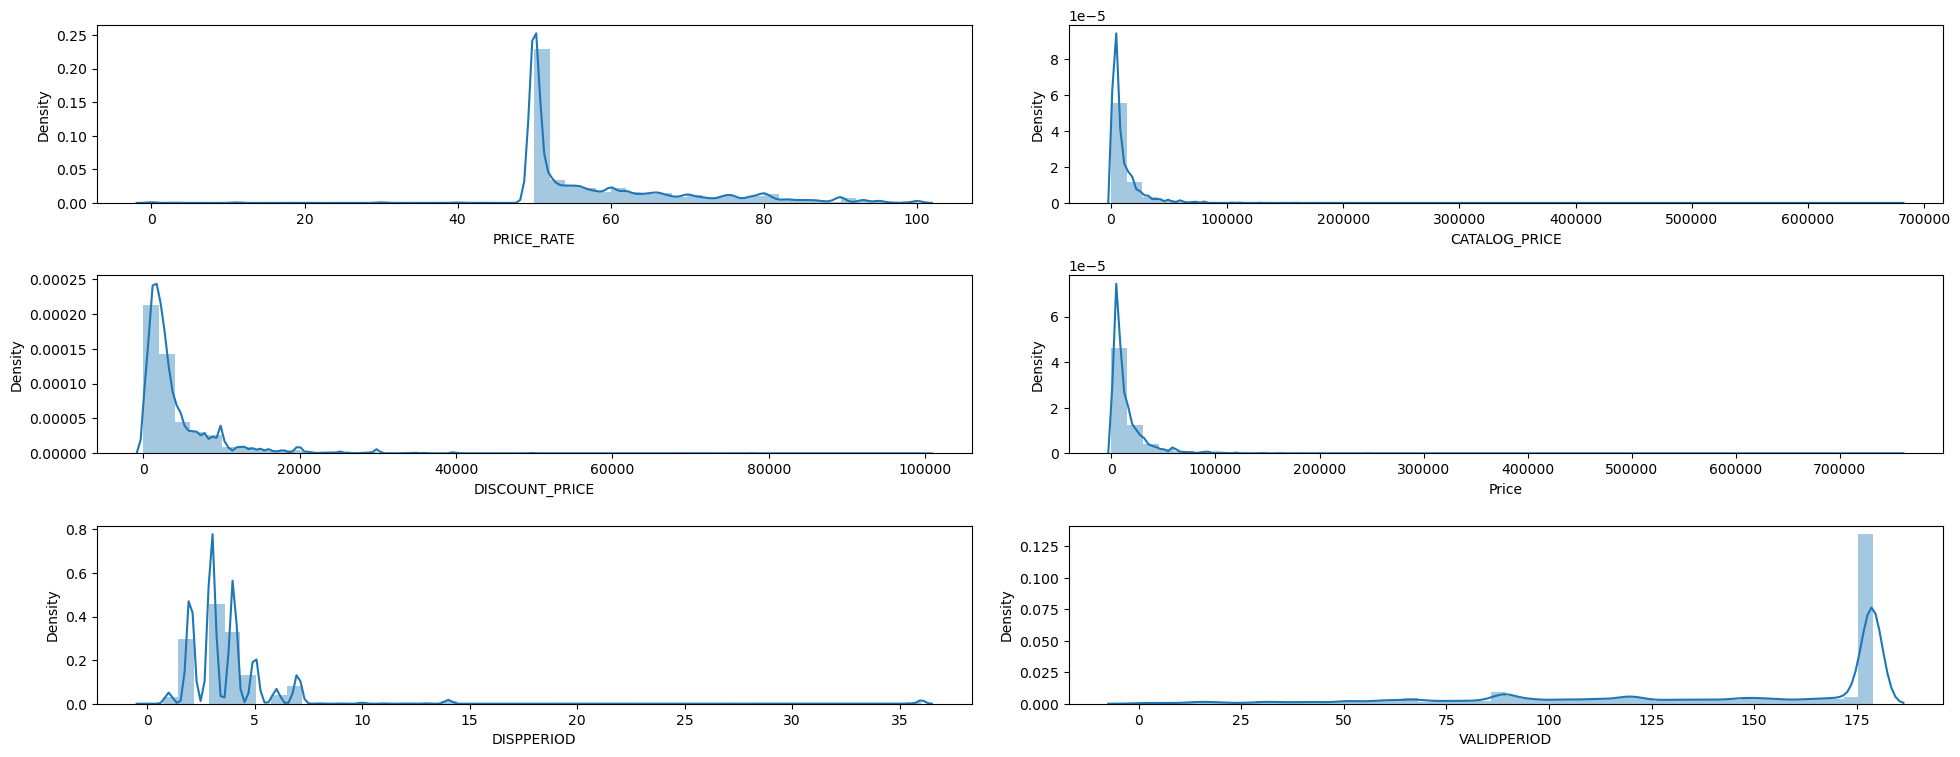

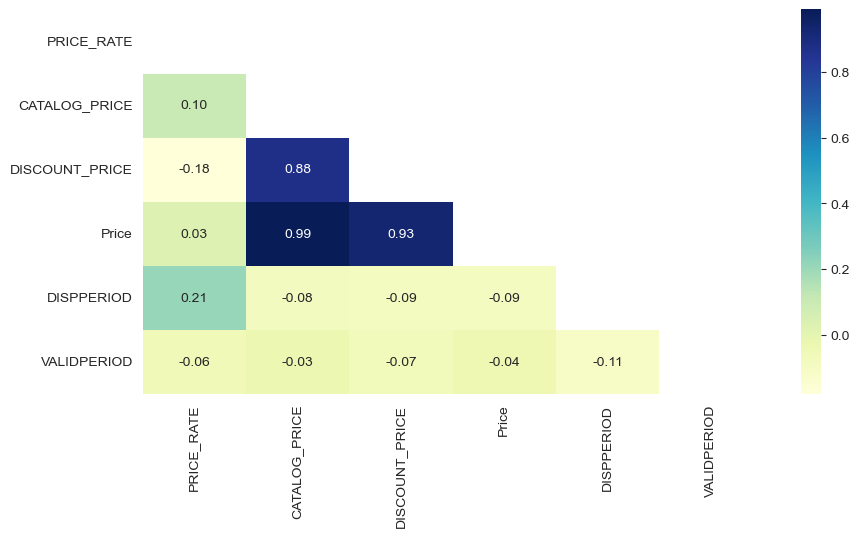

In [57]:
cols = ['PRICE_RATE', 'CATALOG_PRICE', 'DISCOUNT_PRICE', 'Price', 'DISPPERIOD', 'VALIDPERIOD']
plt.figure(figsize=(20, 10))
for idx, col in enumerate(cols):
    plt.subplot(4, 2, idx+1)
    sns.distplot(df[col])
plt.tight_layout(pad=2, h_pad=1)
plt.show()
corr = df.filter(cols).corr()
plt.figure(figsize = (10,5))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, annot=True, fmt = ".2f", cmap = "YlGnBu")
    plt.show(sns)

In [58]:
cl_list["lnDPRICE"] = np.log1p(cl_list["Price"])
cl_list["mDPRICE"] = cl_list.groupby("Case")["lnDPRICE"].transform(np.mean)
cl_list["sDPRICE"] = cl_list.groupby("Case")["lnDPRICE"].transform(np.std)
cl_list["zprice"] = (cl_list["lnDPRICE"] - cl_list["mDPRICE"]) / cl_list["sDPRICE"]

cl_list = cl_list.drop(labels = ['CATALOG_PRICE', 'DISCOUNT_PRICE', 'Price'], axis=1)
cl_list = cl_list.drop(labels = ['lnDPRICE', 'mDPRICE', 'sDPRICE'], axis=1)

In [59]:
CAPSULE = ['Case']
REGION = ['spot_large', 'spot_pref', 'splot_small']
etc = ['SEX_ID', 'AGE']

In [60]:
df = train.copy()

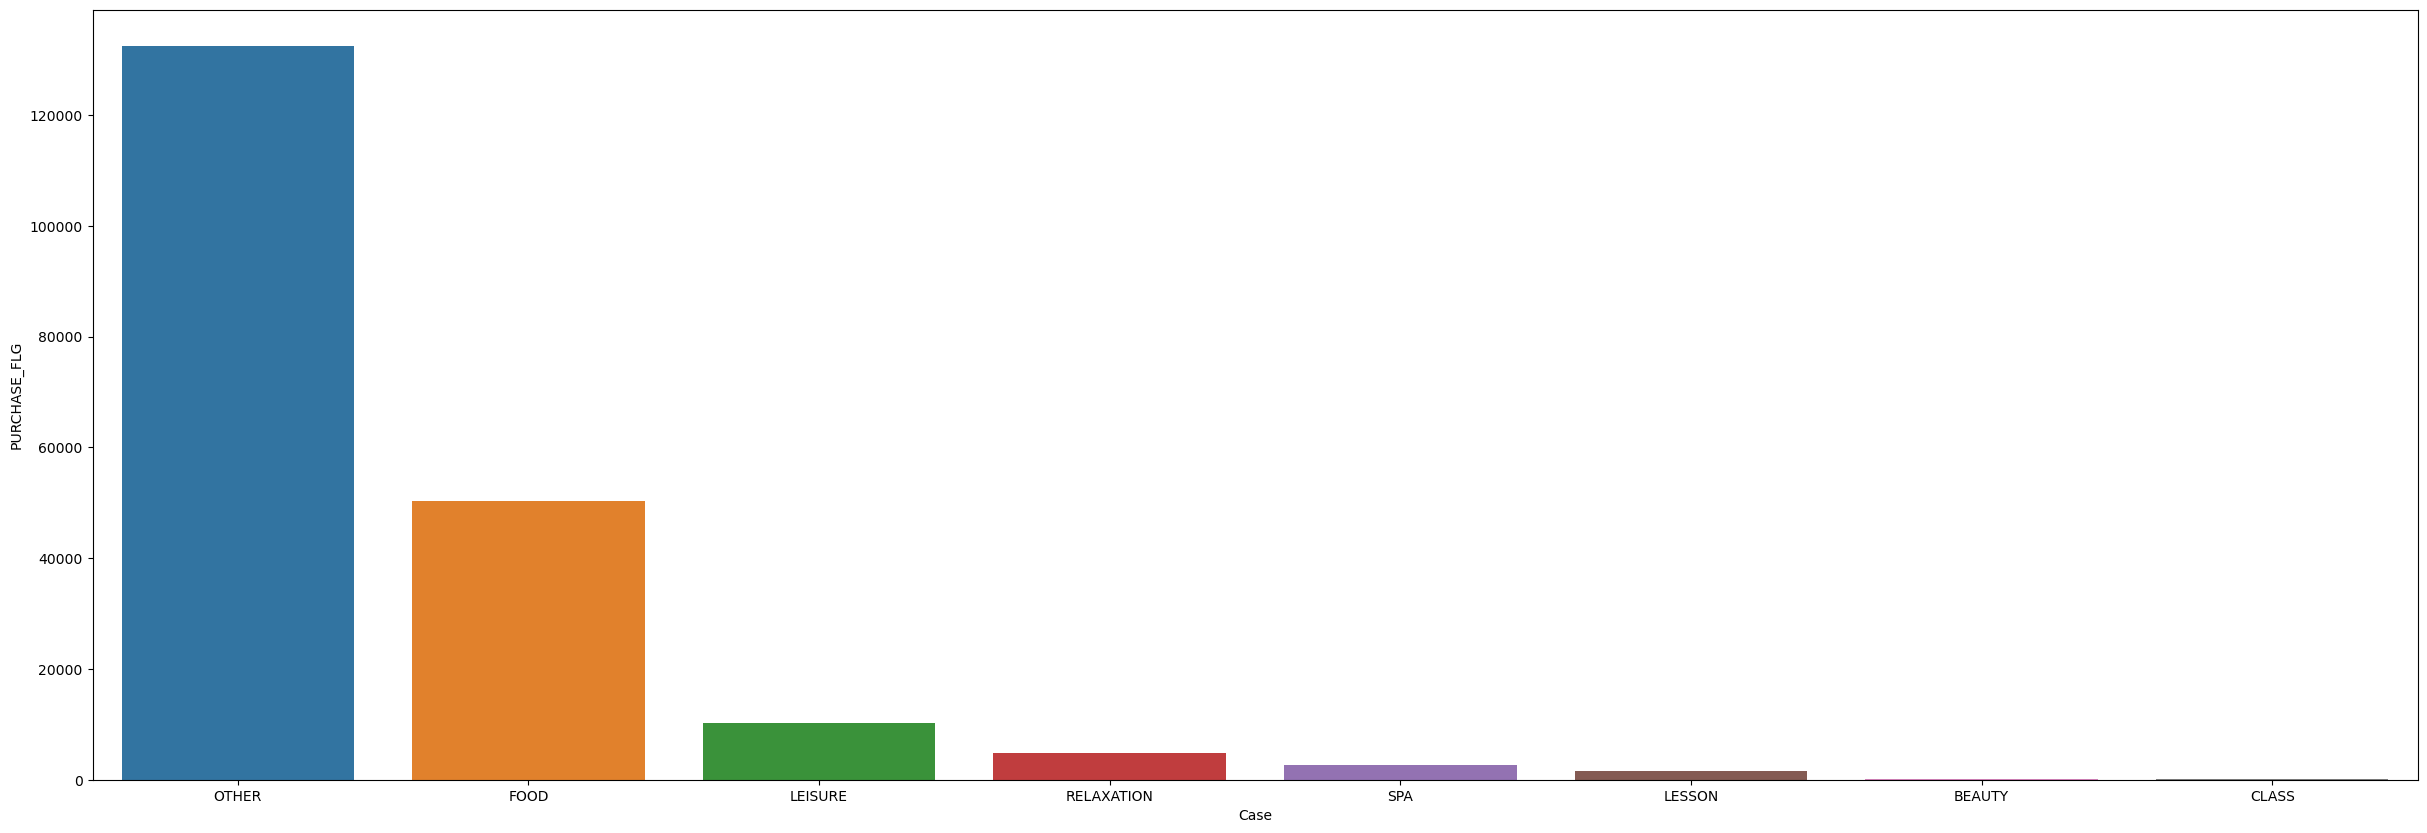

In [61]:
df = df.pivot_table(index = ['Case'], values = ['PURCHASE_FLG'], aggfunc=sum).reset_index()
df = df.sort_values(by='PURCHASE_FLG', ascending=False)
plt.figure(figsize = (30, 10))
sns.barplot(x='Case', y='PURCHASE_FLG', data=df)
plt.show(sns)

In [62]:
df = train.copy()
print('spot_pref : {}개'. format(len(df.spot_pref.unique())))

spot_pref : 47개


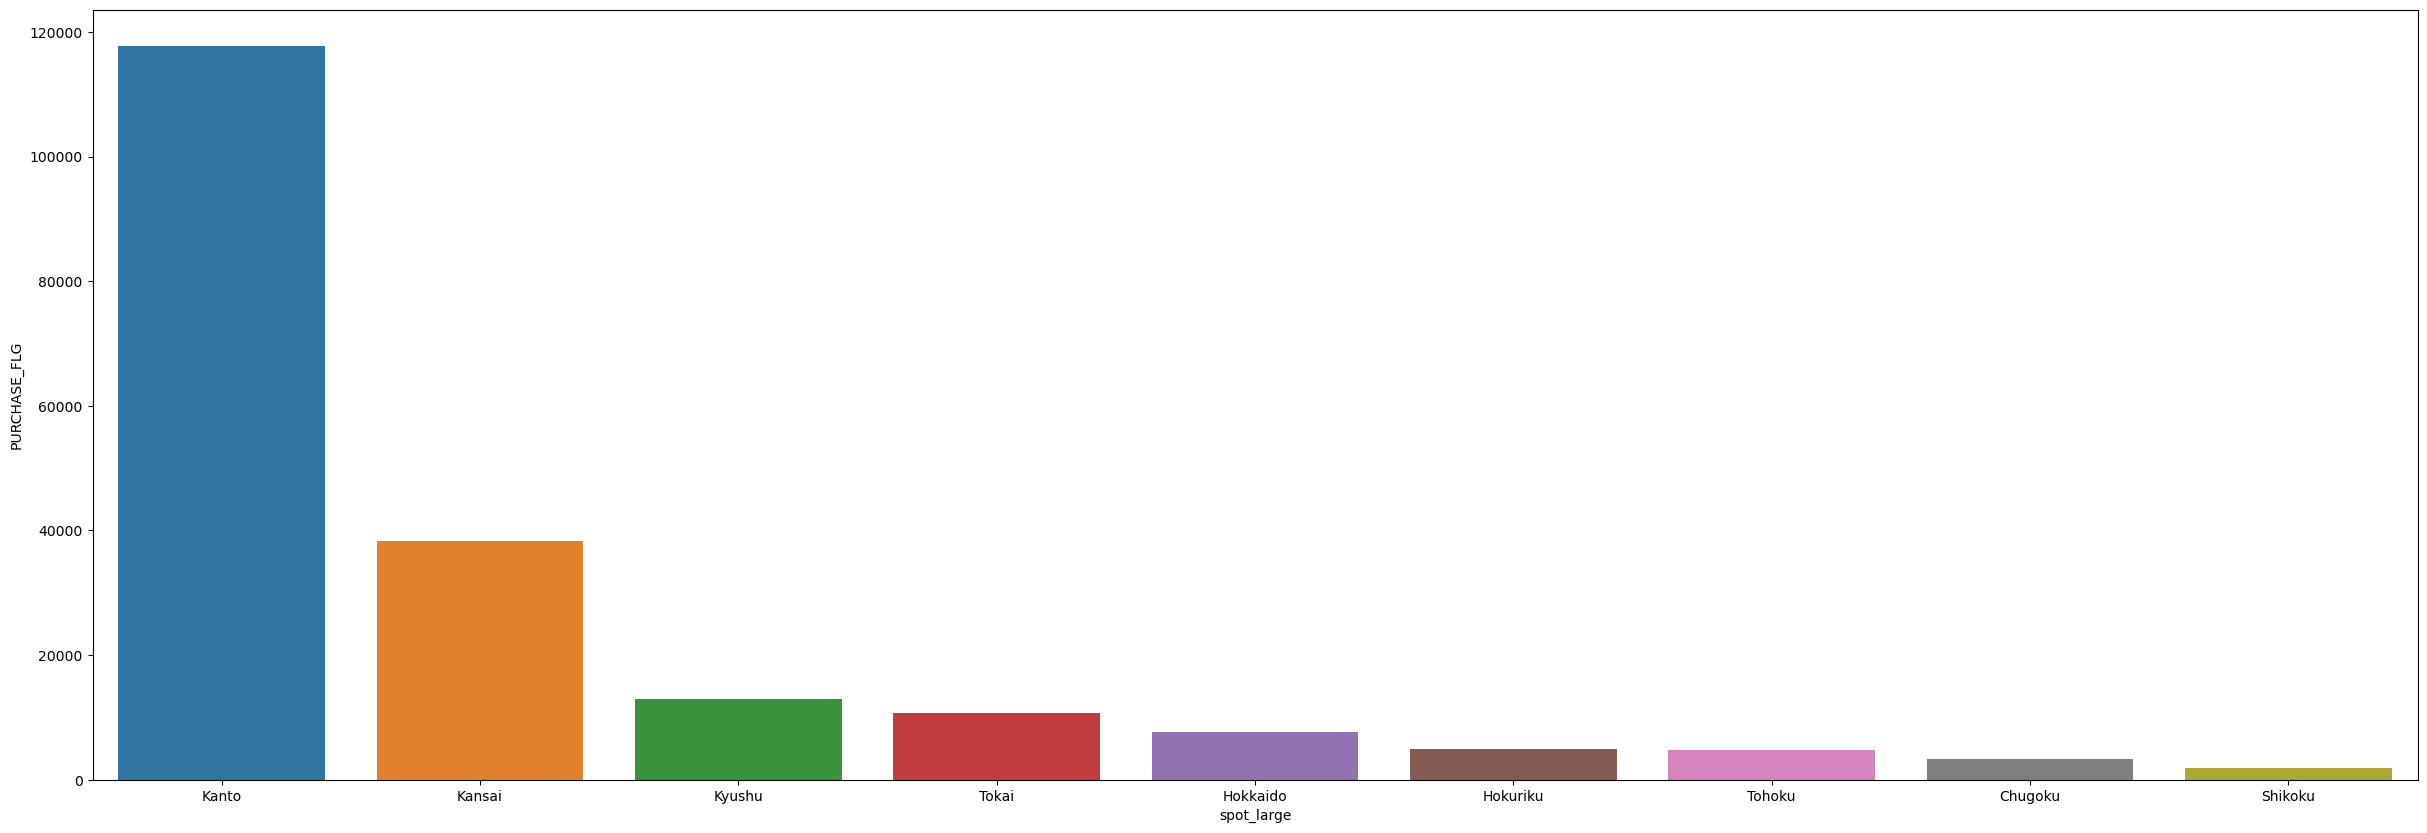

In [63]:
df = train.copy()
df = df.pivot_table(index = ['spot_large'], values = ['PURCHASE_FLG'], aggfunc=sum).reset_index()
df = df.sort_values(by='PURCHASE_FLG', ascending=False)
plt.figure(figsize = (30, 10))
sns.barplot(x='spot_large', y='PURCHASE_FLG', data=df)
plt.show(sns)

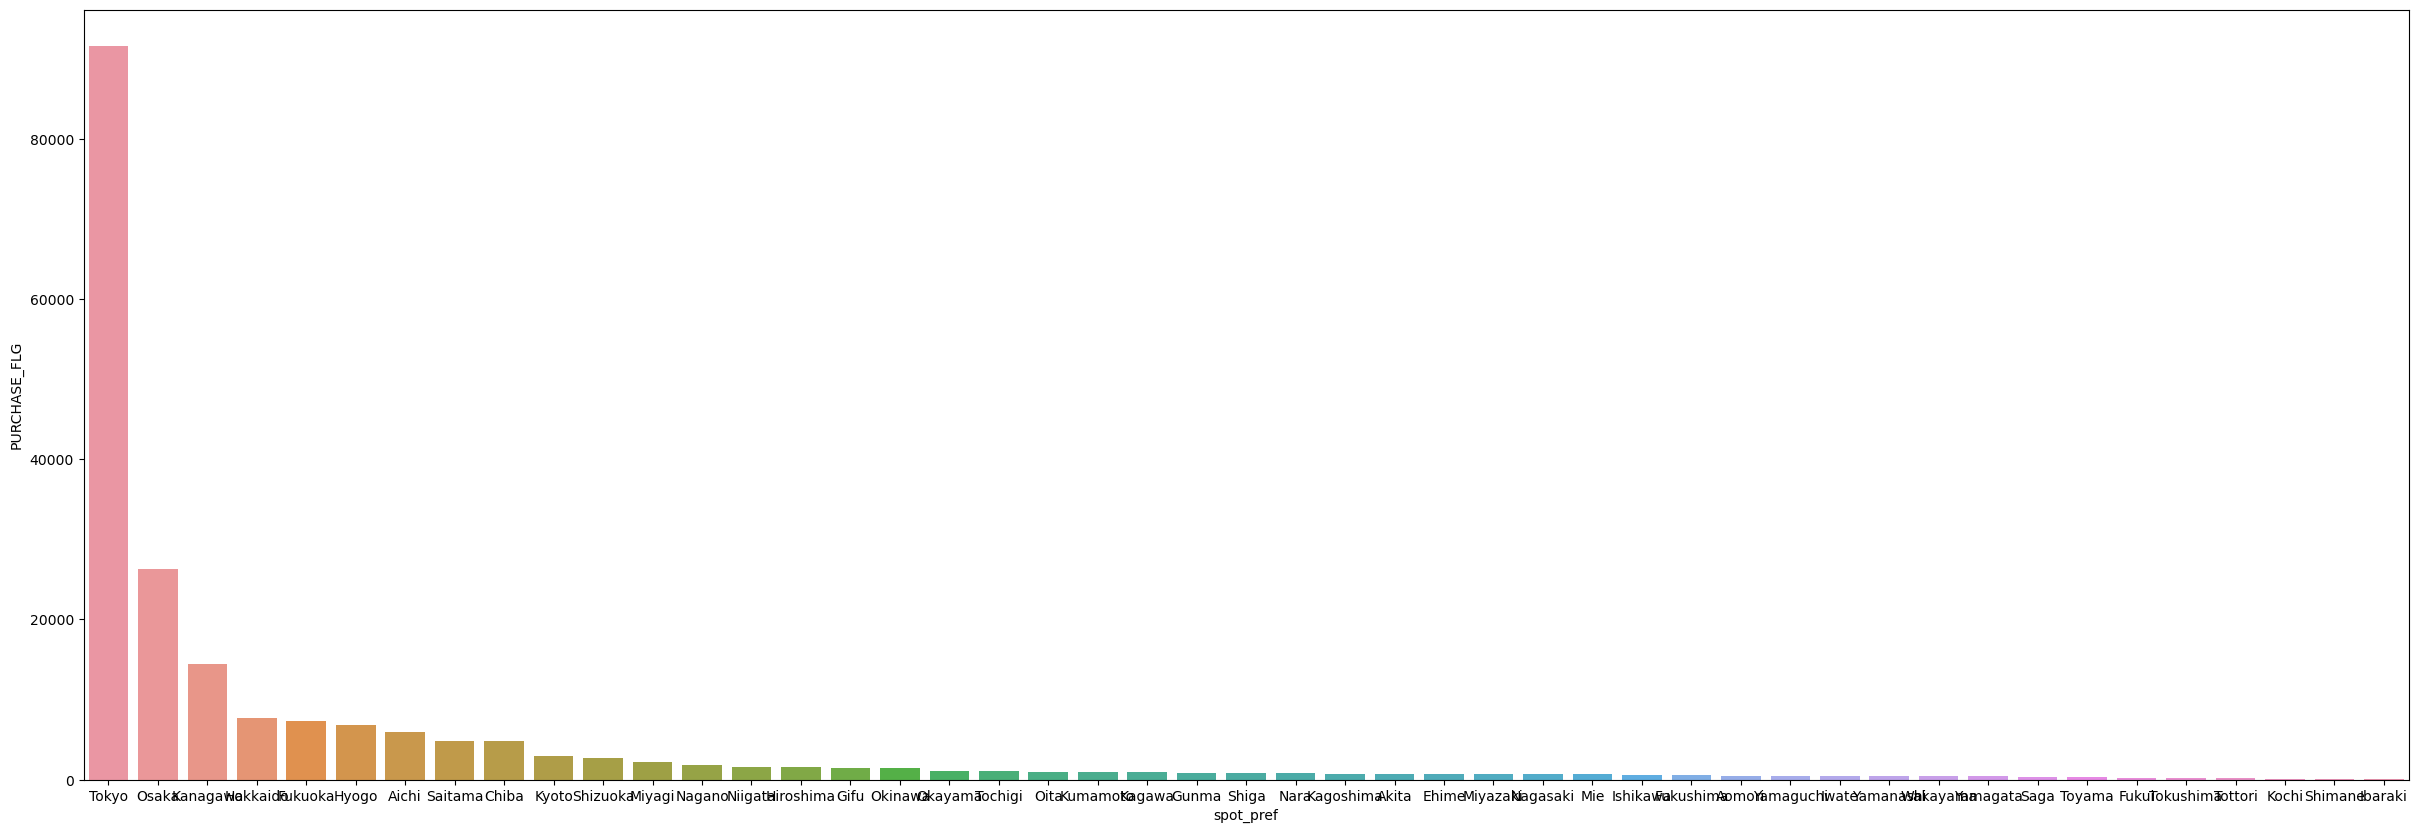

In [64]:
df = train.copy()
df = df.pivot_table(index = ['spot_pref'], values = ['PURCHASE_FLG'], aggfunc=sum).reset_index()
df = df.sort_values(by='PURCHASE_FLG', ascending=False)
plt.figure(figsize = (30, 10))
sns.barplot(x='spot_pref', y='PURCHASE_FLG', data=df)
plt.show(sns)

In [65]:
df = train.copy()
df = df[df['purchase_date'].notnull()]
df['weekday'] = df[['purchase_date']].apply(lambda x: dt.datetime.strftime(x['purchase_date'], '%a'), axis=1)

In [66]:
df_mon = df[df['USABLE_DATE_MON'] == 1]
df_mon = df_mon.groupby(['weekday'])['PURCHASE_FLG'].sum().reset_index()

df_Tue = df[df['USABLE_DATE_TUE'] == 1]
df_Tue = df_Tue.groupby(['weekday'])['PURCHASE_FLG'].sum().reset_index()

df_Wed = df[df['USABLE_DATE_WED'] == 1]
df_Wed = df_mon.groupby(['weekday'])['PURCHASE_FLG'].sum().reset_index()

df_Thu = df[df['USABLE_DATE_THU'] == 1]
df_Thu = df_Thu.groupby(['weekday'])['PURCHASE_FLG'].sum().reset_index()

df_Fri = df[df['USABLE_DATE_FRI'] == 1]
df_Fri = df_Fri.groupby(['weekday'])['PURCHASE_FLG'].sum().reset_index()

df_Sat = df[df['USABLE_DATE_SAT'] == 1]
df_Sat = df_Sat.groupby(['weekday'])['PURCHASE_FLG'].sum().reset_index()

df_Sun = df[df['USABLE_DATE_SUN'] == 1]
df_Sun = df_Sun.groupby(['weekday'])['PURCHASE_FLG'].sum().reset_index()

In [67]:
ls = [df_mon, df_Tue, df_Wed, df_Thu, df_Fri, df_Sat, df_Sun]
title = ['df_mon', 'df_Tue', 'df_Wed', 'df_Thu', 'df_Fri', 'df_sat', 'df_Sun']

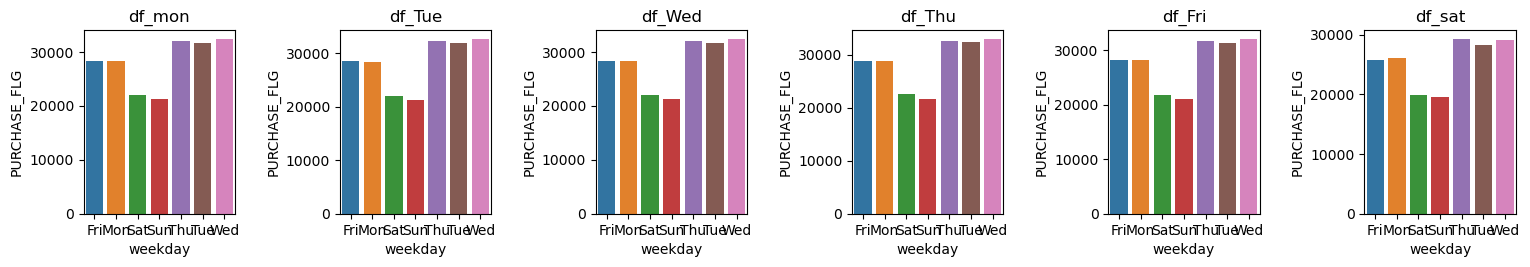

In [68]:
plt.figure(figsize=(20, 5))
for idx, col, title in zip(np.arange(1,7), ls, title):
    plt.subplot(2, 8, idx + 1)
    sns.barplot(x = col.weekday, y= col.PURCHASE_FLG)
    plt.title(title)
plt.tight_layout(pad=2, h_pad=1)
plt.show()

In [69]:
df['usable'] = df['USABLE_DATE_MON'] + df['USABLE_DATE_TUE'] + df['USABLE_DATE_WED'] + df['USABLE_DATE_THU'] \
            + df['USABLE_DATE_FRI'] + df['USABLE_DATE_SAT'] + df['USABLE_DATE_SUN'] + df['USABLE_DATE_HOLIDAY'] \
                + df['USABLE_DATE_BEFORE_HOLIDAY']

In [70]:
df_usable = df.groupby(['usable'])['PURCHASE_FLG'].sum().reset_index()
sns.barplot(x='usable', y='PURCHASE_FLG', data=df_usable)
plt.show(sns)

<AxesSubplot:xlabel='usable', ylabel='PURCHASE_FLG'>

## Converting data into Train set and Test Set

In [57]:
train['key'] = train['COUPON_ID_hash']+ train['USER_ID_hash']

In [58]:
train_loc['key'] = train_loc['COUPON_ID_hash'] + train_loc['USER_ID_hash'] 
train_loc.drop_duplicates(['key'], inplace=True)

In [59]:
train.insert(2, 'distance', train['key'].map(train_loc.set_index('key')['distance']))
train.insert(2, 'PREF_in', train['key'].map(train_loc.set_index('key')['PREF_in']))

In [60]:
train.drop(labels=['key', 'spot_large', 'spot_pref', 'spot_small','lnDPRICE',
       'mDPRICE','WITHDRAW_DATE', 'user_pref','purchase_date', 'resid_small', 'CAPSULE_TEXT',
       'GENRE_NAME','CATALOG_PRICE', 'DISCOUNT_PRICE',
       'DISPFROM', 'DISPEND','VALIDFROM', 'VALIDEND'], axis=1, inplace=True)

In [61]:
train[:2]

,PURCHASE_FLG,view_date,PREF_in,distance,COUPON_ID_hash,USER_ID_hash,VIEW,PRICE_RATE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,Case,Price,sDPRICE,zprice,REG_DATE,SEX_ID,AGE
0,0,2012-03-28,0,NaN,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,1.0,78.0,4.0,179.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,OTHER,8775.0,0.915395,-0.238,2012-03-28 14:14:18,0,25
1,0,2012-03-28,0,NaN,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,1.0,78.0,4.0,179.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,OTHER,8775.0,0.915395,-0.238,2012-03-28 14:14:18,0,25


In [62]:
train.columns

Index(['PURCHASE_FLG', 'view_date', 'PREF_in', 'distance', 'COUPON_ID_hash',
       'USER_ID_hash', 'VIEW', 'PRICE_RATE', 'DISPPERIOD', 'VALIDPERIOD',
       'USABLE_DATE_MON', 'USABLE_DATE_TUE', 'USABLE_DATE_WED',
       'USABLE_DATE_THU', 'USABLE_DATE_FRI', 'USABLE_DATE_SAT',
       'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY', 'USABLE_DATE_BEFORE_HOLIDAY',
       'Case', 'Price', 'sDPRICE', 'zprice', 'REG_DATE', 'SEX_ID', 'AGE'],
      dtype='object')

In [63]:
train = train[train['Price'] >= 0]

In [64]:
train['VALIDPERIOD'] = train['VALIDPERIOD'].fillna(10000)
# train['user_pref'] = train['user_pref'].fillna('NN')
train['VIEW'] = train['VIEW'].fillna(0)

In [65]:
train['distance'] = train['distance'].fillna(train['distance'].mean())

In [66]:
summary_table(train).sort_values(by='unique', ascending = True)

,act,dtype,name,null,unique
0,2597810.0,int64,PURCHASE_FLG,0.0,2.0
18,2597810.0,float64,USABLE_DATE_BEFORE_HOLIDAY,0.0,2.0
17,2597810.0,float64,USABLE_DATE_HOLIDAY,0.0,2.0
16,2597810.0,float64,USABLE_DATE_SUN,0.0,2.0
15,2597810.0,float64,USABLE_DATE_SAT,0.0,2.0
14,2597810.0,float64,USABLE_DATE_FRI,0.0,2.0
13,2597810.0,float64,USABLE_DATE_THU,0.0,2.0
24,2597810.0,int64,SEX_ID,0.0,2.0
11,2597810.0,float64,USABLE_DATE_TUE,0.0,2.0
10,2597810.0,float64,USABLE_DATE_MON,0.0,2.0


In [67]:
ls_dummy = ['Case']


In [68]:
train = pd.get_dummies(train, columns = ls_dummy)


In [69]:
cl_test['A'] = 1
user_list['A'] = 1
test = pd.merge(cl_test, user_list, how='outer')

In [70]:
test.drop(labels=['CAPSULE_TEXT', 'GENRE_NAME','CATALOG_PRICE',
       'DISCOUNT_PRICE', 'DISPFROM', 'DISPEND', 'VALIDFROM',
       'VALIDEND','lnDPRICE', 'mDPRICE','REG_DATE','WITHDRAW_DATE',
       'user_pref','spot_large', 'spot_pref', 'spot_small'], axis=1, inplace=True)

In [71]:
test[:2]

,PRICE_RATE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,COUPON_ID_hash,Case,Price,sDPRICE,zprice,A,SEX_ID,AGE,USER_ID_hash
0,52,4,118.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,c76ea297ebd3a5a4d3bf9f75269f66fa,FOOD,8349,0.604073,0.487562,1,0,25,d9dca3cb44bab12ba313eaa681f663eb
1,52,4,118.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,c76ea297ebd3a5a4d3bf9f75269f66fa,FOOD,8349,0.604073,0.487562,1,0,34,560574a339f1b25e57b0221e486907ed


In [72]:
test.columns

Index(['PRICE_RATE', 'DISPPERIOD', 'VALIDPERIOD', 'USABLE_DATE_MON',
       'USABLE_DATE_TUE', 'USABLE_DATE_WED', 'USABLE_DATE_THU',
       'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 'USABLE_DATE_SUN',
       'USABLE_DATE_HOLIDAY', 'USABLE_DATE_BEFORE_HOLIDAY', 'COUPON_ID_hash',
       'Case', 'Price', 'sDPRICE', 'zprice', 'A', 'SEX_ID', 'AGE',
       'USER_ID_hash'],
      dtype='object')

In [73]:
test['key'] = test['COUPON_ID_hash'] + test['USER_ID_hash'] 
ar_test['key'] = ar_test['COUPON_ID_hash']  
test.drop(labels = ['key'], axis=1, inplace=True)

In [74]:
test = pd.get_dummies(test, columns = ls_dummy)
test.drop(labels = ['A'], axis=1, inplace=True)
test.fillna(0,inplace=True)

In [75]:
compare_not_test = [i for i in train.columns if i not in test.columns]
compare_not_train = [i for i in test.columns if i not in train.columns]
print('only_train: {}  \n'.format(compare_not_test))
print('only_test: {}'.format(compare_not_train))

only_train: ['PURCHASE_FLG', 'view_date', 'PREF_in', 'distance', 'VIEW', 'REG_DATE', 'Case_BEAUTY', 'Case_LESSON']  

only_test: []


In [85]:
to_be_removed_train = {'PURCHASE_FLG', 'USER_ID_hash','COUPON_ID_hash', "VIEW","REG_DATE"}
ls_train = [i for i in list(train.columns) if i not in to_be_removed_train]
X_train = train.filter(ls_train)
y_train = train.PURCHASE_FLG

In [77]:
X_train[:2]

,view_date,PREF_in,distance,PRICE_RATE,DISPPERIOD,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,Price,sDPRICE,zprice,SEX_ID,AGE,Case_BEAUTY,Case_CLASS,Case_FOOD,Case_LEISURE,Case_LESSON,Case_OTHER,Case_RELAXATION,Case_SPA
0,2012-03-28,0,211.026943,78.0,4.0,179.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8775.0,0.915395,-0.238,0,25,0,0,0,0,0,1,0,0
1,2012-03-28,0,211.026943,78.0,4.0,179.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8775.0,0.915395,-0.238,0,25,0,0,0,0,0,1,0,0


### Modelling

#### Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier
import joblib
rfc = RandomForestClassifier(random_state=0, verbose=1, n_jobs=-1, n_estimators=240, class_weight="balanced_subsample")

In [168]:
mod_ls = [i for i in X_train.columns if i in test.columns]
X_train = train.filter(mod_ls)
y_train = train.PURCHASE_FLG

In [169]:
model_rfc = rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  9.1min finished


In [170]:
model_rfc.classes_

array([0, 1], dtype=int64)

In [171]:
joblib.dump(rfc,'CPP_REPO_RF.mdl')

['CPP_REPO_RF.mdl']

In [172]:
test2 = test

In [173]:
y_hat_proba_rfc = model_rfc.predict_proba(test2.filter(mod_ls))
df_y_hat_proba_rfc= pd.DataFrame(y_hat_proba_rfc, columns=['n','y'])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   50.5s
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed:  1.1min finished


In [174]:
test_rfc = test.filter(['USER_ID_hash', 'COUPON_ID_hash'])

In [175]:
result_proba_rfc = pd.concat([test_rfc, pd.DataFrame(df_y_hat_proba_rfc)],1)

In [194]:
mse_rf = result_proba_rfc.y.mean()

In [195]:
mse_rf

0.08707630451872607

In [196]:
import math
rmse_rf = math.sqrt(mse_rf)
rmse_rf

0.29508694399909674

In [177]:
sub = test[['USER_ID_hash','COUPON_ID_hash']]
sub['TARGET'] = y_hat_proba_rfc[:,1]

In [178]:
grouped = sub.groupby('USER_ID_hash')

In [179]:
def get_top10(row):
    pred = grouped.get_group(row.USER_ID_hash).sort_values(by=['TARGET'],ascending=False)
    pred = ' '.join(map(str, pred.head(10).COUPON_ID_hash.values))
    return pred

In [180]:
submissions = pd.DataFrame(grouped,columns=['USER_ID_hash','PURCHASED_COUPONS'])

In [181]:
submissions['PURCHASED_COUPONS'] = submissions.apply(get_top10, axis=1)

In [182]:
submissions

,USER_ID_hash,PURCHASED_COUPONS
0,0000b53e182165208887ba65c079fc21,c988d799bc7db9254fe865ee6cf2d4ff a6de36cd4b8a2...
1,00035b86e6884589ec8d28fbf2fe7757,0c015306597566b632bebfb63b7e59f3 89abee8c5b418...
2,0005b1068d5f2b8f2a7c978fcfe1ca06,46da51ba6dd20c514c2802f79a4e94b2 17d83b27fbae3...
3,000cc06982785a19e2a2fdb40b1c9d59,89abee8c5b418c5a27dff7121b56c890 9bfec8781a9c9...
4,0013518e41c416cd6a181d277dd8ca0b,6a1e3719167c9dd19490043ca5768d1c a6de36cd4b8a2...
...,...,...
22868,fff1a623187cefd7a594e338709b0f40,c988d799bc7db9254fe865ee6cf2d4ff b36879abb93ee...
22869,fff4a076cfda6ff9dbe85e1cb678791b,0c015306597566b632bebfb63b7e59f3 fa94b2db3a3ac...
22870,fff970d2014c3e10a77e38d540239017,46da51ba6dd20c514c2802f79a4e94b2 0c01530659756...
22871,fffafc024e264d5d539813444cf61199,46da51ba6dd20c514c2802f79a4e94b2 9752ad849fd13...


In [108]:
submissions.to_csv('D:/aml2/Random_forest_submission.csv',index = False,header=True)

#### Extreme gradient Boost(XGBoost)

In [183]:
import xgboost

In [184]:
mod_ls = [i for i in X_train.columns if i in test.columns]
X_train = train.filter(mod_ls)
y_train = train.PURCHASE_FLG

In [185]:
model_xgb = xgboost.XGBClassifier(n_estimators=300, max_depth=3,
                                 objective = 'reg:logistic',
                                 subsample= 0.85,
                                 colsample_bytree=0.8,
                                 random_state=12345,
                                 min_child_weight=1,
                                 learning_rate=0.05)

In [186]:
model_xgb = model_xgb.fit(X_train, y_train)

In [187]:
y_pred_xgb = model_xgb.predict(test.filter(mod_ls))

In [188]:
y_hat_proba = model_xgb.predict_proba(test.filter(mod_ls))
df_y_hat_proba= pd.DataFrame(y_hat_proba, columns=['n','y'])

In [189]:
test_xgb = test.filter(['USER_ID_hash', 'COUPON_ID_hash'])

In [190]:
result_proba_df = pd.concat([test_xgb, pd.DataFrame(df_y_hat_proba)],1)

In [197]:
mse_xb = result_proba_df.y.mean()

In [198]:
mse_xb

0.07181163

In [199]:
import math
rmse_xb = math.sqrt(mse_xb)
rmse_xb

0.26797692311448584

In [192]:
importances = model_xgb.feature_importances_
df_imp = pd.DataFrame()
for i, j in zip(mod_ls, list(importances)):
    data = {'columns': i, 'importance': np.round(j*100,1)} 
    df_imp = df_imp.append(data, ignore_index=True)

df_imp.sort_values(by='importance', ascending=False)

,columns,importance
8,USABLE_DATE_SAT,19.7
12,Price,19.0
14,zprice,15.4
11,USABLE_DATE_BEFORE_HOLIDAY,5.2
19,Case_LEISURE,4.3
1,DISPPERIOD,4.3
18,Case_FOOD,4.2
0,PRICE_RATE,4.0
20,Case_OTHER,3.5
2,VALIDPERIOD,3.4


In [119]:
result_proba_df2 = result_proba_df[result_proba_df['y']>0.08].sort_values(by='y', ascending=False)

In [120]:
lookup_table = result_proba_df2.groupby('USER_ID_hash').apply(lambda x: list(x.COUPON_ID_hash))
lookup_table = pd.DataFrame(lookup_table, columns = ['COUPON_ID_hash']).reset_index()
lookup_table

lookup_table.rename(columns={'COUPON_ID_hash':'PURCHASED_COUPONS'},inplace=True)

In [121]:
lookup_table

,USER_ID_hash,PURCHASED_COUPONS
0,0000b53e182165208887ba65c079fc21,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
1,00035b86e6884589ec8d28fbf2fe7757,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
2,0005b1068d5f2b8f2a7c978fcfe1ca06,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
3,000cc06982785a19e2a2fdb40b1c9d59,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
4,0013518e41c416cd6a181d277dd8ca0b,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
...,...,...
22868,fff1a623187cefd7a594e338709b0f40,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
22869,fff4a076cfda6ff9dbe85e1cb678791b,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
22870,fff970d2014c3e10a77e38d540239017,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
22871,fffafc024e264d5d539813444cf61199,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."


In [122]:
submission = pd.DataFrame(lookup_table,columns=['USER_ID_hash','PURCHASED_COUPONS'])

In [123]:
submission.insert(2, 'COUPON', submission['USER_ID_hash'].map(lookup_table.set_index('USER_ID_hash')['PURCHASED_COUPONS']))

In [124]:
submission

,USER_ID_hash,PURCHASED_COUPONS,COUPON
0,0000b53e182165208887ba65c079fc21,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
1,00035b86e6884589ec8d28fbf2fe7757,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
2,0005b1068d5f2b8f2a7c978fcfe1ca06,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
3,000cc06982785a19e2a2fdb40b1c9d59,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
4,0013518e41c416cd6a181d277dd8ca0b,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
...,...,...,...
22868,fff1a623187cefd7a594e338709b0f40,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
22869,fff4a076cfda6ff9dbe85e1cb678791b,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
22870,fff970d2014c3e10a77e38d540239017,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."
22871,fffafc024e264d5d539813444cf61199,"[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3...","[0c015306597566b632bebfb63b7e59f3, 79de77aa8c3..."


In [125]:
submission.drop('PURCHASED_COUPONS', axis=1, inplace=True)
submission.rename(columns={'COUPON':'PURCHASED_COUPONS'}, inplace=True)
submission['PURCHASED_COUPONS'] = submission['PURCHASED_COUPONS'].astype('str')
submission['PURCHASED_COUPONS'] = submission['PURCHASED_COUPONS'].apply(lambda x: x.replace('[',''))
submission['PURCHASED_COUPONS'] = submission['PURCHASED_COUPONS'].apply(lambda x: x.replace(']',''))

In [126]:
submission

,USER_ID_hash,PURCHASED_COUPONS
0,0000b53e182165208887ba65c079fc21,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."
1,00035b86e6884589ec8d28fbf2fe7757,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."
2,0005b1068d5f2b8f2a7c978fcfe1ca06,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."
3,000cc06982785a19e2a2fdb40b1c9d59,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."
4,0013518e41c416cd6a181d277dd8ca0b,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."
...,...,...
22868,fff1a623187cefd7a594e338709b0f40,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."
22869,fff4a076cfda6ff9dbe85e1cb678791b,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."
22870,fff970d2014c3e10a77e38d540239017,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."
22871,fffafc024e264d5d539813444cf61199,"'0c015306597566b632bebfb63b7e59f3', '79de77aa8..."


In [127]:
submission.to_csv('D:/aml2/XG_BOOST_submission.csv',index = False,header=True)

### CHI_SQUARE_TEST

In [152]:
cd_train = pd.read_csv('coupon_detail_train.csv',parse_dates=['I_DATE'])

In [153]:
contingency_table=pd.crosstab(cd_train["USER_ID_hash"],cd_train["COUPON_ID_hash"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [154]:
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [155]:
from scipy import stats
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[5.91729982e-06 4.61549386e-04 2.95864991e-04 ... 3.55037989e-05
  5.91729982e-06 1.18345996e-05]
 [5.91729982e-06 4.61549386e-04 2.95864991e-04 ... 3.55037989e-05
  5.91729982e-06 1.18345996e-05]
 [1.18345996e-05 9.23098772e-04 5.91729982e-04 ... 7.10075978e-05
  1.18345996e-05 2.36691993e-05]
 ...
 [2.36691993e-05 1.84619754e-03 1.18345996e-03 ... 1.42015196e-04
  2.36691993e-05 4.73383985e-05]
 [1.18345996e-05 9.23098772e-04 5.91729982e-04 ... 7.10075978e-05
  1.18345996e-05 2.36691993e-05]
 [1.77518995e-05 1.38464816e-03 8.87594973e-04 ... 1.06511397e-04
  1.77518995e-05 3.55037989e-05]]


In [156]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df11=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",cd_train)
alpha = 0.05

Degree of Freedom:-         ITEM_COUNT              I_DATE SMALL_AREA_NAME  \
0                1 2012-03-28 15:06:06              兵庫   
1                1 2011-07-04 23:52:54     銀座・新橋・東京・上野   
2                1 2011-07-16 00:52:49       恵比寿・目黒・品川   
3                1 2011-07-16 00:54:53       恵比寿・目黒・品川   
4                1 2011-07-16 00:55:52       恵比寿・目黒・品川   
...            ...                 ...             ...   
168991           1 2012-02-07 12:14:50       池袋・神楽坂・赤羽   
168992           1 2012-02-28 15:43:21     銀座・新橋・東京・上野   
168993           1 2012-03-19 12:11:16     銀座・新橋・東京・上野   
168994           2 2012-04-12 12:27:34  新宿・高田馬場・中野・吉祥寺   
168995           1 2012-05-09 12:12:26  新宿・高田馬場・中野・吉祥寺   

                         PURCHASEID_hash                      USER_ID_hash  \
0       c820a8882374a4e472f0984a8825893f  d9dca3cb44bab12ba313eaa681f663eb   
1       1b4eb2435421ede98c8931c42e8220ec  560574a339f1b25e57b0221e486907ed   
2       36b5f9ba46c44b65587d0b16f2e4c77f  560574a

In [157]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 26168.0361452477


In [158]:
critical_value=chi2.ppf(q=1-alpha,df=df11)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [159]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=df11)
print('p-value:',p_value)

p-value: 0.0


In [160]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df11)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 26168.0361452477
critical_value: 3.841458820694124
p-value: 0.0


In [161]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


### ANN(Artificial Neural Network)

In [127]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(12, input_dim=23, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                288       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [128]:
mod_ls = [i for i in X_train.columns if i in test.columns]
X_train = train.filter(mod_ls)
y_train = train.PURCHASE_FLG

In [129]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','mape'])

In [130]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/20
41565/41565 [==============================] - 35s 853us/step - loss: 102.4036 - mse: 102.4036 - mae: 0.3275 - mape: 266333984.0000 - val_loss: 0.1382 - val_mse: 0.1382 - val_mae: 0.1902 - val_mape: 45136920.0000
Epoch 2/20
41565/41565 [==============================] - 37s 884us/step - loss: 0.0537 - mse: 0.0537 - mae: 0.1072 - mape: 53614096.0000 - val_loss: 0.1362 - val_mse: 0.1362 - val_mae: 0.1898 - val_mape: 46351820.0000
Epoch 3/20
41565/41565 [==============================] - 42s 1ms/step - loss: 0.0534 - mse: 0.0534 - mae: 0.1067 - mape: 53335500.0000 - val_loss: 0.1359 - val_mse: 0.1359 - val_mae: 0.1946 - val_mape: 51369932.0000
Epoch 4/20
41565/41565 [==============================] - 40s 953us/step - loss: 0.0534 - mse: 0.0534 - mae: 0.1067 - mape: 53333956.0000 - val_loss: 0.1357 - val_mse: 0.1357 - val_mae: 0.1916 - val_mape: 48540532.0000
Epoch 5/20
41565/41565 [==============================] - 38s 922us/step - loss: 0.0534 - mse: 0.0534 - mae: 0.1066 - map

In [131]:
y_pred_ann = model.predict(test.filter(mod_ls))

In [134]:
y_pred_ann_proba = model.predict_proba(test.filter(mod_ls))

In [139]:
df_y_hat_proba_ann= pd.DataFrame(y_pred_ann_proba, columns=['y'])

In [140]:
test_ann = test.filter(['USER_ID_hash', 'COUPON_ID_hash'])

In [141]:
result_proba_ann = pd.concat([test_ann, pd.DataFrame(df_y_hat_proba_ann)],1)

In [165]:
mse = result_proba_ann.y.mean()

In [193]:
mse

0.055211406

In [166]:
import math
rmse_ann = math.sqrt(mse)
rmse_ann

0.23497107524358013

In [143]:
result_proba_ann2 = result_proba_ann[result_proba_ann['y']>0.08].sort_values(by='y', ascending=False)

In [144]:
lookup_table3 = result_proba_ann2.groupby('USER_ID_hash').apply(lambda x: list(x.COUPON_ID_hash))
lookup_table3 = pd.DataFrame(lookup_table3, columns = ['COUPON_ID_hash']).reset_index()
lookup_table3

lookup_table3.rename(columns={'COUPON_ID_hash':'PURCHASED_COUPONS'},inplace=True)

In [145]:
lookup_table3

,USER_ID_hash,PURCHASED_COUPONS
0,0000b53e182165208887ba65c079fc21,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
1,00035b86e6884589ec8d28fbf2fe7757,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
2,0005b1068d5f2b8f2a7c978fcfe1ca06,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
3,000cc06982785a19e2a2fdb40b1c9d59,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
4,0013518e41c416cd6a181d277dd8ca0b,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
...,...,...
22868,fff1a623187cefd7a594e338709b0f40,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
22869,fff4a076cfda6ff9dbe85e1cb678791b,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
22870,fff970d2014c3e10a77e38d540239017,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
22871,fffafc024e264d5d539813444cf61199,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."


In [146]:
submission_ann = pd.DataFrame(lookup_table3,columns=['USER_ID_hash','PURCHASED_COUPONS'])

In [147]:
submission_ann.insert(2, 'COUPON', submission_ann['USER_ID_hash'].map(lookup_table3.set_index('USER_ID_hash')['PURCHASED_COUPONS']))

In [148]:
submission_ann

,USER_ID_hash,PURCHASED_COUPONS,COUPON
0,0000b53e182165208887ba65c079fc21,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
1,00035b86e6884589ec8d28fbf2fe7757,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
2,0005b1068d5f2b8f2a7c978fcfe1ca06,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
3,000cc06982785a19e2a2fdb40b1c9d59,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
4,0013518e41c416cd6a181d277dd8ca0b,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
...,...,...,...
22868,fff1a623187cefd7a594e338709b0f40,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
22869,fff4a076cfda6ff9dbe85e1cb678791b,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
22870,fff970d2014c3e10a77e38d540239017,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."
22871,fffafc024e264d5d539813444cf61199,"[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6...","[79de77aa8c36fdf17cb3366e2084e353, 520cb8509c6..."


In [149]:
submission_ann.drop('PURCHASED_COUPONS', axis=1, inplace=True)
submission_ann.rename(columns={'COUPON':'PURCHASED_COUPONS'}, inplace=True)
submission_ann['PURCHASED_COUPONS'] = submission_ann['PURCHASED_COUPONS'].astype('str')
submission_ann['PURCHASED_COUPONS'] = submission_ann['PURCHASED_COUPONS'].apply(lambda x: x.replace('[',''))
submission_ann['PURCHASED_COUPONS'] = submission_ann['PURCHASED_COUPONS'].apply(lambda x: x.replace(']',''))

In [150]:
submission_ann

,USER_ID_hash,PURCHASED_COUPONS
0,0000b53e182165208887ba65c079fc21,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."
1,00035b86e6884589ec8d28fbf2fe7757,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."
2,0005b1068d5f2b8f2a7c978fcfe1ca06,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."
3,000cc06982785a19e2a2fdb40b1c9d59,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."
4,0013518e41c416cd6a181d277dd8ca0b,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."
...,...,...
22868,fff1a623187cefd7a594e338709b0f40,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."
22869,fff4a076cfda6ff9dbe85e1cb678791b,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."
22870,fff970d2014c3e10a77e38d540239017,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."
22871,fffafc024e264d5d539813444cf61199,"'79de77aa8c36fdf17cb3366e2084e353', '520cb8509..."


In [151]:
submission_ann.to_csv('D:/aml2/ANN_submission.csv',index = False,header=True)